<a href="https://colab.research.google.com/github/kowshik27/GRIP_Intern_Tasks/blob/main/GRIP_Task7_Stock_Market_Prediction_updated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **GRIP Task-7: Stock Market Prediction using Numerical and Textual Analysis** <br>
#**Objective:**
## Create a hybrid model for stock price/performance prediction using numerical analysis of historical stock prices, and sentimental analysis of news headlines 

#### We all know that the stock prices fluctuate a lot. Many of great investor do read newspaper and they invest by analyzing the news. <br> In this task, I created a model which predict the stock market price on that day if we provided the model the sentiment analysis of news headlines on that day.

## Here we are going to analyze and predict the S&P BSE 500 stock using Times of India news headlines dataset provided in Harvard Dataverse.

link for headlines dataset: https://bit.ly/36fFPI6<br>
link for stock price(historical) dataset: https://yhoo.it/3uUottI


## Step-1: Importing Libraries

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
%matplotlib inline
import seaborn as sns

## For Numerical analysis of BSE 500 stock historical data

In [2]:
stock_data = pd.read_csv('/content/drive/MyDrive/Dataset project/BSE-500.BO.csv')

In [3]:
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,2007-09-17,6156.120117,6185.830078,6102.629883,6125.069824,6125.069824,187195200.0
1,2007-09-18,6136.330078,6199.839844,6117.209961,6192.879883,6192.879883,204315300.0
2,2007-09-19,6274.509766,6403.439941,6274.509766,6399.479980,6399.479980,240600500.0
3,2007-09-20,6408.549805,6463.220215,6386.939941,6437.810059,6437.810059,239021800.0
4,2007-09-21,6442.580078,6526.720215,6435.350098,6514.379883,6514.379883,467215000.0
...,...,...,...,...,...,...,...
3649,2022-06-28,21334.910156,21482.339844,21243.250000,21453.259766,21453.259766,100.0
3650,2022-06-29,21265.449219,21447.880859,21238.910156,21380.990234,21380.990234,100.0
3651,2022-06-30,21359.029297,21500.250000,21281.669922,21324.539063,21324.539063,100.0
3652,2022-07-01,21284.320313,21385.400391,21018.580078,21340.250000,21340.250000,100.0


In [4]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       3654 non-null   object 
 1   Open       3616 non-null   float64
 2   High       3616 non-null   float64
 3   Low        3616 non-null   float64
 4   Close      3616 non-null   float64
 5   Adj Close  3616 non-null   float64
 6   Volume     3616 non-null   float64
dtypes: float64(6), object(1)
memory usage: 200.0+ KB


In [5]:
stock_data.isnull().sum()

Date          0
Open         38
High         38
Low          38
Close        38
Adj Close    38
Volume       38
dtype: int64

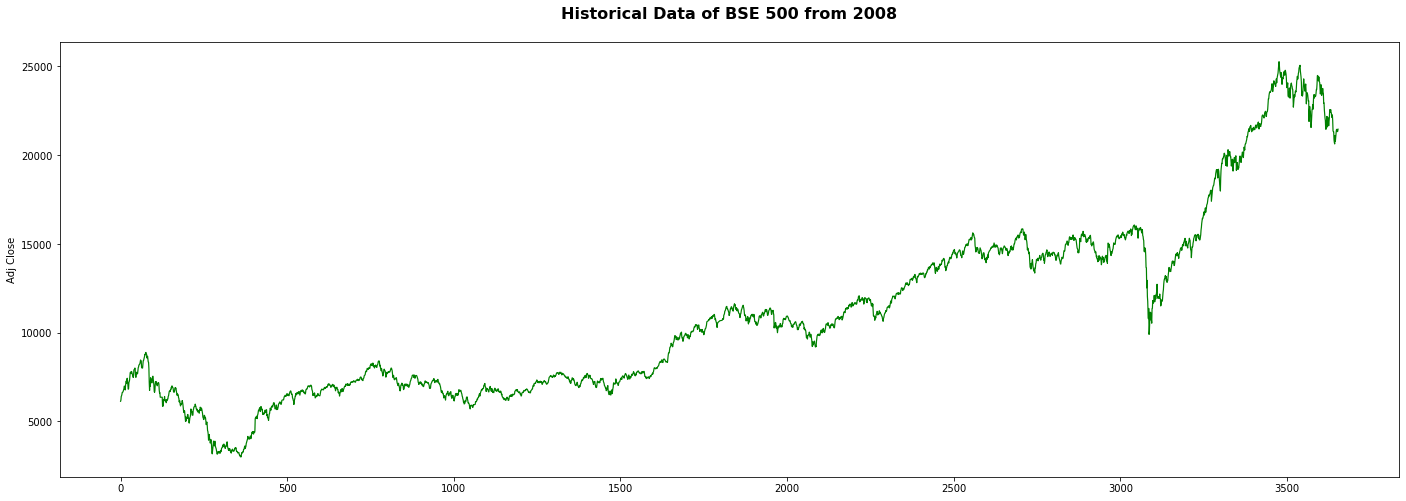

In [6]:
# Plot to understand the trend of stock prices
plt.figure(figsize=(24,8))
sns.lineplot(x = stock_data.index, y= stock_data['Adj Close'],linewidth = 1.2,color = 'green')
plt.title('Historical Data of BSE 500 from 2008\n', fontdict= {'fontsize':16,'fontweight':'bold'})
plt.show()

## Data Cleaning 

In [7]:
# Changing date to python date object
stock_data['Date'] = pd.to_datetime(stock_data['Date'], format = '%Y-%m-%d')

In [8]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3654 non-null   datetime64[ns]
 1   Open       3616 non-null   float64       
 2   High       3616 non-null   float64       
 3   Low        3616 non-null   float64       
 4   Close      3616 non-null   float64       
 5   Adj Close  3616 non-null   float64       
 6   Volume     3616 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 200.0 KB


In [9]:
stock_data[stock_data['Adj Close'].isnull() == 1][0:5]

,Date,Open,High,Low,Close,Adj Close,Volume
393,2009-04-30,NaN,NaN,NaN,NaN,NaN,NaN
585,2010-02-06,NaN,NaN,NaN,NaN,NaN,NaN
913,2011-05-31,NaN,NaN,NaN,NaN,NaN,NaN
1032,2011-11-24,NaN,NaN,NaN,NaN,NaN,NaN
1053,2011-12-26,NaN,NaN,NaN,NaN,NaN,NaN


In [10]:
# Filling the null values with values in previous date
stock_data =stock_data.fillna(method='bfill')

In [11]:
stock_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3654 entries, 0 to 3653
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       3654 non-null   datetime64[ns]
 1   Open       3654 non-null   float64       
 2   High       3654 non-null   float64       
 3   Low        3654 non-null   float64       
 4   Close      3654 non-null   float64       
 5   Adj Close  3654 non-null   float64       
 6   Volume     3654 non-null   float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 200.0 KB


## creating two new features 

In [12]:
# Creating Fluctuations column by checking the volume increased from previous date or not
stock_data['Fluctuations'] = np.where(stock_data['Volume'].shift(-1) > stock_data['Volume'],1,0)

# Returns column which gives % change in price from previous date
stock_data['Returns'] = stock_data['Adj Close'].pct_change()
stock_data['Returns'][0] = 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


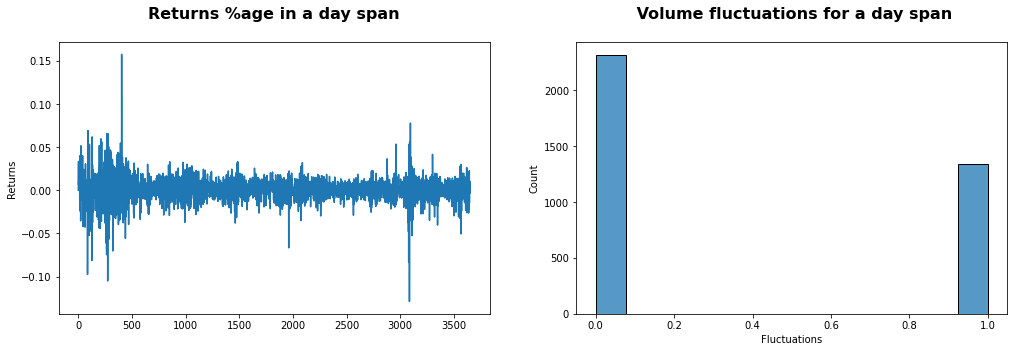

In [13]:
plt.subplots(figsize=(17,5))
plt.subplot(1,2,1)
sns.lineplot(x = stock_data.index, y= stock_data['Returns'])
plt.title('Returns %age in a day span\n', fontdict= {'fontsize':16,'fontweight':'bold'})

plt.subplot(1,2,2)
sns.histplot(x= stock_data['Fluctuations'])
plt.title(' Volume fluctuations for a day span\n', fontdict= {'fontsize':16,'fontweight':'bold'})
plt.show()

In [14]:
stock_data = round(stock_data,4)
stock_data

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns
0,2007-09-17,6156.1201,6185.8301,6102.6299,6125.0698,6125.0698,187195200.0,1,0.0000
1,2007-09-18,6136.3301,6199.8398,6117.2100,6192.8799,6192.8799,204315300.0,1,0.0111
2,2007-09-19,6274.5098,6403.4399,6274.5098,6399.4800,6399.4800,240600500.0,0,0.0334
3,2007-09-20,6408.5498,6463.2202,6386.9399,6437.8101,6437.8101,239021800.0,1,0.0060
4,2007-09-21,6442.5801,6526.7202,6435.3501,6514.3799,6514.3799,467215000.0,0,0.0119
...,...,...,...,...,...,...,...,...,...
3649,2022-06-28,21334.9102,21482.3398,21243.2500,21453.2598,21453.2598,100.0,0,0.0017
3650,2022-06-29,21265.4492,21447.8809,21238.9102,21380.9902,21380.9902,100.0,0,-0.0034
3651,2022-06-30,21359.0293,21500.2500,21281.6699,21324.5391,21324.5391,100.0,0,-0.0026
3652,2022-07-01,21284.3203,21385.4004,21018.5801,21340.2500,21340.2500,100.0,0,0.0007


In [15]:
# Verifying if there are any null values
stock_data.isnull().sum()

Date            0
Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
Fluctuations    0
Returns         0
dtype: int64

## For Categorical Analysis of News Headlines

In [16]:
path = '/content/drive/MyDrive/Colab Notebooks/india-news-headlines.csv'
news_data = pd.read_csv(path)

In [17]:
news_data.head(-1)

,publish_date,headline_category,headline_text
0,20010102,unknown,Status quo will not be disturbed at Ayodhya; s...
1,20010102,unknown,Fissures in Hurriyat over Pak visit
2,20010102,unknown,America's unwanted heading for India?
3,20010102,unknown,For bigwigs; it is destination Goa
4,20010102,unknown,Extra buses to clear tourist traffic
...,...,...,...
3424061,20201231,city.bengaluru,Peddler nabbed; 10kg ganja seized in Anantapur...
3424062,20201231,city.jodhpur,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,20201231,city.udaipur,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,20201231,city.ajmer,Covid-19: Despite dip in cases; Rajasthan amon...


In [18]:
news_data['headline_category'].value_counts()

india                                              288541
unknown                                            209582
city.mumbai                                        134428
city.delhi                                         127717
business.india-business                            116761
                                                    ...  
entertainment.hindi.music.singer-of-the-week            8
scorecard-and-statistics                                8
elections.lok-sabha-elections-2019.tripura.news         8
indias-vision                                           8
2013-the-year-sachin-bids-adieu.football-2013           8
Name: headline_category, Length: 1013, dtype: int64

In [19]:
# dropping category column
news_data= news_data.drop('headline_category',axis =1)

# renamining date column
news_data = news_data.rename(columns = {'publish_date':'Date'})

# Changing date to python date format
from datetime import datetime
news_data['Date'] = pd.to_datetime(news_data['Date'], format = '%Y%m%d')
news_data

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-02,Fissures in Hurriyat over Pak visit
2,2001-01-02,America's unwanted heading for India?
3,2001-01-02,For bigwigs; it is destination Goa
4,2001-01-02,Extra buses to clear tourist traffic
...,...,...
3424062,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424063,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424064,2020-12-31,Covid-19: Despite dip in cases; Rajasthan amon...
3424065,2020-12-31,Govt extends deadline for use of FASTag till F...


In [20]:
news_data['headline_text'].value_counts()

Straight Answers                                           6723
Cartoons                                                   1536
Straight answers                                           1500
Photogallery                                               1353
Your say                                                   1012
                                                           ... 
Tansidco to study small unitsamprsquo issues                  1
Tension mounts over Mullaperiyar; life hit                    1
HC issues notices against illegal mining at Maina             1
ampnbspDogs will add to CRPF spypower                         1
Peddler nabbed; 10kg ganja seized in Anantapur district       1
Name: headline_text, Length: 3168800, dtype: int64

In [21]:
news_data.duplicated().sum()

154493

In [22]:
#dropping the duplicates only keeping the last value of each duplicates
news_data.drop_duplicates(keep='last', inplace=True, ignore_index=True)

news_data.duplicated().sum()

0

In [23]:
#getting a list of unique dates in Date column
lst = news_data['Date'].value_counts().index.tolist()

#concatenating all the headline_text column values of same date as a single row
new = []
for x in lst:
  df = news_data.loc[news_data['Date'] == x]
  headlinetext = ''
  publishdate = str(x)
  headlinetext = df['headline_text'].iloc[0]
  for i in range(1 , len(df)):
    headlinetext = headlinetext + '. '+ df['headline_text'].iloc[i]  
  new.append(headlinetext)


In [24]:
newsdf = pd.DataFrame({'Date': lst, 'headline_text' : new})
newsdf = newsdf.sort_values(by='Date',ignore_index=True)
newsdf

,Date,headline_text
0,2001-01-02,Status quo will not be disturbed at Ayodhya; s...
1,2001-01-03,Powerless north India gropes in the dark. Thin...
2,2001-01-04,Claire Danes inks to star in 'It's About Love'...
3,2001-01-05,Faleiro vows to fight common cadre proposal. T...
4,2001-01-06,Light combat craft takes India into club class...
...,...,...
7257,2020-12-27,#BigInterview! Dhritiman Chatterjee: Nobody da...
7258,2020-12-28,Horoscope Today; 28 December 2020: Check astro...
7259,2020-12-29,Man recovers charred remains of 'thief' from h...
7260,2020-12-30,Numerology Readings 30 December 2020: Predicti...


In [25]:
newsdf.iloc[1,1]

"Powerless north India gropes in the dark. Think again; Laxman tells Sangh Parivar. Hurriyat undecided over team to Pakistan. Vajpayee wants to put reforms on fast track. Stephen Hawking keeps date with Mumbai. Anti-Hrithik or anti-hopelessness. Govt plans stadium near Panaji. BJP doing a volte face on casinos: Cong. 3 watershed projects on the anvil. No report yet on fire in Udyog Bhavan. He is the king of 'five star' industry. Petrol pump sealed for selling adulterated fuel. Milk price up by Rs 1 per litre. Congress House is no-smoking zone. Rural weightage: Govt reassures Governor. Bride gets honeymoon surprise: Chopper ride. Is hangover a sign of alcoholicism?. Almatti: AP to wait and watch. 10-year-old girl missing. Hear his messages from the heart. Dance like no one's watching. From reel love to real love. Power row: Bribe attempt charge denied. Lakshamma's cry for help heard. It's shopping time for your newborn. Con games on the catwalk. They are here to help us. These noisy spo

In [42]:
data_merged = pd.merge(stock_data, newsdf, how='inner', on='Date')
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text
0,2007-09-17,6156.1201,6185.8301,6102.6299,6125.0698,6125.0698,187195200.0,1,0.0000,Bipasha's twins!. Come; be a part of the good ...
1,2007-09-18,6136.3301,6199.8398,6117.2100,6192.8799,6192.8799,204315300.0,1,0.0111,Reel bonhomie. It's all about having fun toget...
2,2007-09-19,6274.5098,6403.4399,6274.5098,6399.4800,6399.4800,240600500.0,0,0.0334,Dressed to thrill? Not reely. I am a very posi...
3,2007-09-20,6408.5498,6463.2202,6386.9399,6437.8101,6437.8101,239021800.0,1,0.0060,Hey juniors! Are you ready to rock?. Saawariya...
4,2007-09-21,6442.5801,6526.7202,6435.3501,6514.3799,6514.3799,467215000.0,0,0.0119,Yoga for face. Priyanka Chopra tears abs muscl...
...,...,...,...,...,...,...,...,...,...,...
3276,2020-12-24,17947.3906,18020.1094,17869.5898,17992.0098,17992.0098,400.0,0,0.0091,How to set the mood for sex during cold winter...
3277,2020-12-28,18079.1504,18178.5195,18078.4297,18164.8691,18164.8691,200.0,0,0.0096,Horoscope Today; 28 December 2020: Check astro...
3278,2020-12-29,18232.9805,18282.6602,18119.9707,18218.9102,18218.9102,200.0,1,0.0030,Man recovers charred remains of 'thief' from h...
3279,2020-12-30,18284.5391,18298.8203,18135.2305,18284.3105,18284.3105,300.0,1,0.0036,Numerology Readings 30 December 2020: Predicti...


In [43]:
data_merged['headline_text'].replace('[^a-zA-Z]',' ',regex=True, inplace=True)
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text
0,2007-09-17,6156.1201,6185.8301,6102.6299,6125.0698,6125.0698,187195200.0,1,0.0000,Bipasha s twins Come be a part of the good ...
1,2007-09-18,6136.3301,6199.8398,6117.2100,6192.8799,6192.8799,204315300.0,1,0.0111,Reel bonhomie It s all about having fun toget...
2,2007-09-19,6274.5098,6403.4399,6274.5098,6399.4800,6399.4800,240600500.0,0,0.0334,Dressed to thrill Not reely I am a very posi...
3,2007-09-20,6408.5498,6463.2202,6386.9399,6437.8101,6437.8101,239021800.0,1,0.0060,Hey juniors Are you ready to rock Saawariya...
4,2007-09-21,6442.5801,6526.7202,6435.3501,6514.3799,6514.3799,467215000.0,0,0.0119,Yoga for face Priyanka Chopra tears abs muscl...
...,...,...,...,...,...,...,...,...,...,...
3276,2020-12-24,17947.3906,18020.1094,17869.5898,17992.0098,17992.0098,400.0,0,0.0091,How to set the mood for sex during cold winter...
3277,2020-12-28,18079.1504,18178.5195,18078.4297,18164.8691,18164.8691,200.0,0,0.0096,Horoscope Today December Check astro...
3278,2020-12-29,18232.9805,18282.6602,18119.9707,18218.9102,18218.9102,200.0,1,0.0030,Man recovers charred remains of thief from h...
3279,2020-12-30,18284.5391,18298.8203,18135.2305,18284.3105,18284.3105,300.0,1,0.0036,Numerology Readings December Predicti...


In [44]:
!pip install vaderSentiment
from textblob import TextBlob
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## <br> Subjectivity -> distinguishes factual and personal feeling, expression,opinion or statement. Ranges from 0(Objective,factual) to 1(Totally subjective)

## Polarity --> tells the how the text sounds as positive, negative, compound or neutral

In [45]:
# Creating subjectivity for headlines

# Function for polarity & subjectivity
subjectivity = []
polarity = []
for idx, row in data_merged.iterrows():
  subjectivity.append(TextBlob(row['headline_text']).sentiment[1])
  polarity.append(TextBlob(row['headline_text']).sentiment[0])

In [46]:
data_merged['subjectivity'] = subjectivity
data_merged['polarity'] = polarity
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text,subjectivity,polarity
0,2007-09-17,6156.1201,6185.8301,6102.6299,6125.0698,6125.0698,187195200.0,1,0.0000,Bipasha s twins Come be a part of the good ...,0.355900,0.050470
1,2007-09-18,6136.3301,6199.8398,6117.2100,6192.8799,6192.8799,204315300.0,1,0.0111,Reel bonhomie It s all about having fun toget...,0.433558,0.078738
2,2007-09-19,6274.5098,6403.4399,6274.5098,6399.4800,6399.4800,240600500.0,0,0.0334,Dressed to thrill Not reely I am a very posi...,0.461690,0.140959
3,2007-09-20,6408.5498,6463.2202,6386.9399,6437.8101,6437.8101,239021800.0,1,0.0060,Hey juniors Are you ready to rock Saawariya...,0.385582,0.083681
4,2007-09-21,6442.5801,6526.7202,6435.3501,6514.3799,6514.3799,467215000.0,0,0.0119,Yoga for face Priyanka Chopra tears abs muscl...,0.432914,0.015467
...,...,...,...,...,...,...,...,...,...,...,...,...
3276,2020-12-24,17947.3906,18020.1094,17869.5898,17992.0098,17992.0098,400.0,0,0.0091,How to set the mood for sex during cold winter...,0.388662,0.051830
3277,2020-12-28,18079.1504,18178.5195,18078.4297,18164.8691,18164.8691,200.0,0,0.0096,Horoscope Today December Check astro...,0.410399,0.071263
3278,2020-12-29,18232.9805,18282.6602,18119.9707,18218.9102,18218.9102,200.0,1,0.0030,Man recovers charred remains of thief from h...,0.408506,0.051767
3279,2020-12-30,18284.5391,18298.8203,18135.2305,18284.3105,18284.3105,300.0,1,0.0036,Numerology Readings December Predicti...,0.438782,0.048746


In [47]:
data_merged

,Date,Open,High,Low,Close,Adj Close,Volume,Fluctuations,Returns,headline_text,subjectivity,polarity
0,2007-09-17,6156.1201,6185.8301,6102.6299,6125.0698,6125.0698,187195200.0,1,0.0000,Bipasha s twins Come be a part of the good ...,0.355900,0.050470
1,2007-09-18,6136.3301,6199.8398,6117.2100,6192.8799,6192.8799,204315300.0,1,0.0111,Reel bonhomie It s all about having fun toget...,0.433558,0.078738
2,2007-09-19,6274.5098,6403.4399,6274.5098,6399.4800,6399.4800,240600500.0,0,0.0334,Dressed to thrill Not reely I am a very posi...,0.461690,0.140959
3,2007-09-20,6408.5498,6463.2202,6386.9399,6437.8101,6437.8101,239021800.0,1,0.0060,Hey juniors Are you ready to rock Saawariya...,0.385582,0.083681
4,2007-09-21,6442.5801,6526.7202,6435.3501,6514.3799,6514.3799,467215000.0,0,0.0119,Yoga for face Priyanka Chopra tears abs muscl...,0.432914,0.015467
...,...,...,...,...,...,...,...,...,...,...,...,...
3276,2020-12-24,17947.3906,18020.1094,17869.5898,17992.0098,17992.0098,400.0,0,0.0091,How to set the mood for sex during cold winter...,0.388662,0.051830
3277,2020-12-28,18079.1504,18178.5195,18078.4297,18164.8691,18164.8691,200.0,0,0.0096,Horoscope Today December Check astro...,0.410399,0.071263
3278,2020-12-29,18232.9805,18282.6602,18119.9707,18218.9102,18218.9102,200.0,1,0.0030,Man recovers charred remains of thief from h...,0.408506,0.051767
3279,2020-12-30,18284.5391,18298.8203,18135.2305,18284.3105,18284.3105,300.0,1,0.0036,Numerology Readings December Predicti...,0.438782,0.048746


## Merging Two Datasets

#### size of bse stock prizes is 3297x7<br> size of headlines data is 7262× 2 <br> How to merge?<hr>

## We use date attribute to merge stockdta with news data

In [63]:
X = data_merged.drop(labels = ['Date','headline_text','Close','Adj Close'],axis =1)
y = data_merged['Close']
from sklearn.model_selection import train_test_split
Xtrain,Xtest,ytrain,ytest = train_test_split(X,y, test_size = 0.15,shuffle= False)
Xtrain

,Open,High,Low,Volume,Fluctuations,Returns,subjectivity,polarity
0,6156.1201,6185.8301,6102.6299,187195200.0,1,0.0000,0.355900,0.050470
1,6136.3301,6199.8398,6117.2100,204315300.0,1,0.0111,0.433558,0.078738
2,6274.5098,6403.4399,6274.5098,240600500.0,0,0.0334,0.461690,0.140959
3,6408.5498,6463.2202,6386.9399,239021800.0,1,0.0060,0.385582,0.083681
4,6442.5801,6526.7202,6435.3501,467215000.0,0,0.0119,0.432914,0.015467
...,...,...,...,...,...,...,...,...
2783,14274.2197,14354.4805,14084.1504,105500.0,1,0.0038,0.390580,0.029713
2784,14436.6904,14457.3799,14382.9297,109791300.0,0,0.0039,0.419342,0.024149
2785,14429.6602,14550.0898,14429.6504,88070500.0,0,0.0088,0.383921,0.028288
2786,14569.1904,14602.4805,14529.2305,71973900.0,1,0.0017,0.411415,0.051863


In [64]:
# TO check splitting 
print('The size of Xtrain is ',Xtrain.shape,'\nThe size of Xtest is', Xtest.shape,'\nThe size of ytrain is', ytrain.shape,'\nThe size of ytest is', ytest.shape)

The size of Xtrain is  (2788, 8) 
The size of Xtest is (493, 8) 
The size of ytrain is (2788,) 
The size of ytest is (493,)


## Hybrid Model Implementation

In [65]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=10, max_depth=None,min_samples_split=2, random_state=0)
rf.fit(Xtrain, ytrain)
ypredRf=rf.predict(Xtest)

In [66]:
from sklearn.ensemble import AdaBoostRegressor
adb = AdaBoostRegressor()
adb.fit(Xtrain, ytrain)
ypredAdb = adb.predict(Xtest)

In [67]:
df = pd.DataFrame({'yactual':ytest,'ypred-Randomforest': ypredRf ,'ypred-Adaboost':ypredAdb})
df[0:10]

,yactual,ypred-Randomforest,ypred-Adaboost
2788,14432.4004,14451.23320,14697.978024
2789,14290.8496,14342.51700,14697.978024
2790,14355.0195,14329.46915,14697.978024
2791,14389.3496,14458.56005,14697.978024
2792,14425.5703,14385.06613,14697.978024
2793,14470.1699,14468.78407,14697.978024
2794,14459.8496,14467.02609,14697.978024
2795,14422.9805,14429.11112,14697.978024
2796,14350.3701,14360.55099,14697.978024
2797,14514.4297,14495.12908,14697.978024


In [68]:
from sklearn.metrics import mean_absolute_error,r2_score
abs_errAdb = mean_absolute_error(ypredAdb,ytest)
abs_err_Rf = mean_absolute_error(ypredRf,ytest)
r2score_rf = r2_score(ypredRf,ytest)
r2score_adb = r2_score(ypredAdb,ytest)
print('Mean Absolute error of Adaboost',round(abs_errAdb,4),'\nMean Absolute error of Random-Forest',round(abs_err_Rf,4))
print("R2 Score of Random forest is \t", r2score_rf)
print("R2 Score of Adaboost is \t", r2score_adb)

Mean Absolute error of Adaboost 413.2687 
Mean Absolute error of Random-Forest 168.3349
R2 Score of Random forest is 	 0.8552259821274445
R2 Score of Adaboost is 	 0.5450780040823457


## Let us visualize those results

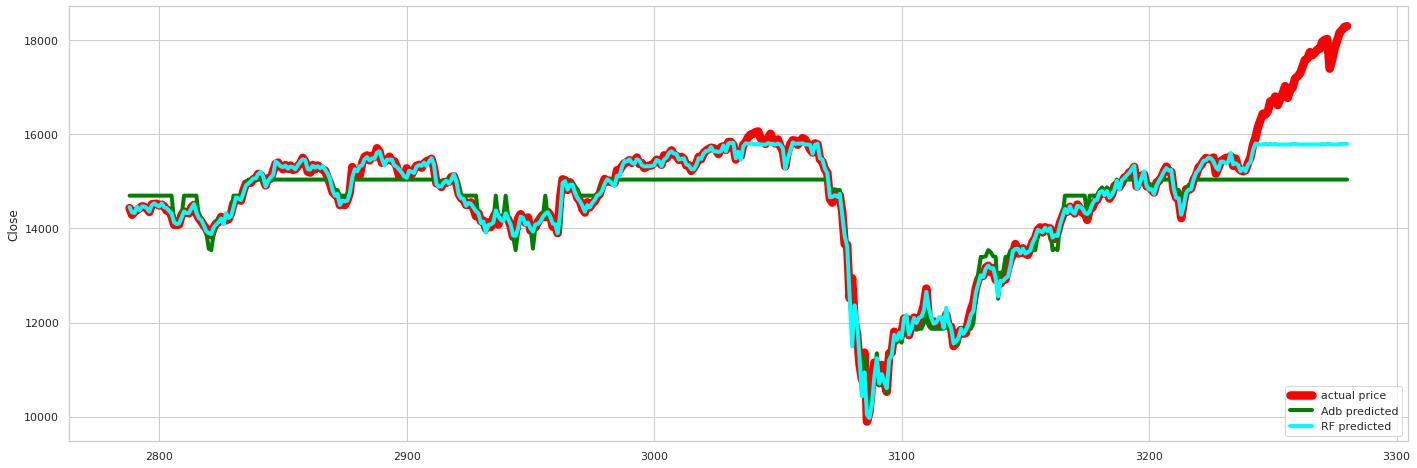

In [69]:
sns.set_theme(style="whitegrid")
plt.figure(figsize=(24,8))
sns.lineplot(x = range(2788,3281), y= ytest,label = 'actual price', color='red',linewidth=8.5)
sns.lineplot(x=range(2788,3281),y=ypredAdb,label="Adb predicted",color = 'green',linewidth=4)
sns.lineplot(x=range(2788,3281),y=ypredRf,label='RF predicted',color = 'cyan',linewidth=4)
plt.legend(loc= 'lower right')
plt.show()

## **Conclusion: <br> Random Forest regression have best performance in predicting the stock price**